In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split

sys.path.append("../library")
import RecSys as rs
path = "../clean_data/"

In [2]:
chefmozGeo_r = pd.read_csv(path + "chefmozGeo_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
chefmozProfile_r = pd.read_csv(path + "chefmozProfile_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
rating_final_r = pd.read_csv(path + "rating_final_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userChefmozRelation_r = pd.read_csv(path + "userChefmozRelation_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userGeo_r = pd.read_csv(path + "userGeo_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userProfile_r = pd.read_csv(path + "userProfile_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)

In [3]:
train, test = train_test_split(rating_final_r, test_size=0.2)

# Most Popular Restaurant

## Most visited Restaurant

In [4]:
train.shape

(698, 5)

In [5]:
train.head()

,userID,placeID,rating,food_rating,service_rating
86,65,94,2,1,0
217,124,18,1,1,1
520,47,39,2,2,2
236,93,24,0,1,0
108,62,7,1,0,1


In [6]:
mostVisited = train.groupby('placeID')['userID'].count()

In [7]:
train.head()

,userID,placeID,rating,food_rating,service_rating
86,65,94,2,1,0
217,124,18,1,1,1
520,47,39,2,2,2
236,93,24,0,1,0
108,62,7,1,0,1


In [8]:
mostVisited.sort_values(ascending=False).head(10)

placeID
87    31
1     27
85    22
41    20
35    19
52    19
15    16
82    15
18    15
25    14
Name: userID, dtype: int64

In [9]:
mostVisitedRestaurant = list(mostVisited.sort_values(ascending=False).index)

## Most Rated Restaurant

In [10]:
train.groupby('placeID')['rating'].count().head()

placeID
0     3
1    27
2     9
3     1
4     5
Name: rating, dtype: int64

In [11]:
mostRated = train.groupby('placeID')['rating'].sum()

In [12]:
mostRated.sort_values(ascending=False).head(10)

placeID
87    38
1     33
85    29
35    23
41    23
15    21
76    20
18    19
86    19
77    18
Name: rating, dtype: int64

In [13]:
mostRatedRestaurant = list(mostRated.sort_values(ascending=False).index)

## Highest mean rating Restaurant

In [14]:
train.groupby('placeID')['rating'].count().sort_values(ascending=False).head(10)

placeID
87    31
1     27
85    22
41    20
35    19
52    19
15    16
82    15
18    15
25    14
Name: rating, dtype: int64

In [15]:
train.groupby('placeID')['rating'].count().sort_values(ascending=True).head(10)

placeID
90    1
3     1
49    2
34    2
55    3
72    3
50    3
16    3
31    3
14    3
Name: rating, dtype: int64

In [16]:
def filteredListRatedRestaurant(train, min_ratings=0):
    listRatedRestaurant = train.groupby('placeID')['rating'].apply(list).reset_index()
    filteredListRatedRestaurant = listRatedRestaurant[listRatedRestaurant.rating.apply(lambda x: len(x)>=min_ratings)]
    meanListRatedRestaurant = filteredListRatedRestaurant['rating'].apply(np.mean)
    filteredListRatedRestaurant['mean'] = meanListRatedRestaurant
    return filteredListRatedRestaurant.sort_values('mean',ascending=False)

In [17]:
filteredListRatedRestaurant(train).head(10)

,placeID,rating,mean
3,3,[2],2.00
32,32,"[2, 2, 2, 2, 2]",2.00
36,36,"[2, 2, 2, 2, 2, 2]",2.00
34,34,"[2, 2]",2.00
79,79,"[2, 2, 2, 2]",2.00
65,65,"[2, 2, 1, 2, 2]",1.80
63,63,"[2, 2, 1, 2, 2]",1.80
70,70,"[1, 2, 2, 2]",1.75
37,37,"[2, 2, 2, 1]",1.75
11,11,"[2, 2, 2, 1]",1.75


In [18]:
filteredListRatedRestaurant(train,5).head(10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,placeID,rating,mean
36,36,"[2, 2, 2, 2, 2, 2]",2.000000
32,32,"[2, 2, 2, 2, 2]",2.000000
63,63,"[2, 2, 1, 2, 2]",1.800000
65,65,"[2, 2, 1, 2, 2]",1.800000
76,76,"[2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2]",1.666667
33,33,"[0, 2, 2, 2, 2, 1, 2, 2]",1.625000
85,86,"[2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1]",1.583333
19,19,"[0, 1, 2, 2, 2, 2, 2]",1.571429
22,22,"[1, 2, 2, 2, 2, 0, 2, 1, 2]",1.555556
23,23,"[2, 1, 2, 1, 2, 1, 1, 2]",1.500000


In [19]:
filteredListRatedRestaurant(train,10).head(10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,placeID,rating,mean
76,76,"[2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2]",1.666667
85,86,"[2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1]",1.583333
83,83,"[1, 2, 2, 2, 2, 2, 0, 2, 2, 0]",1.500000
39,39,"[2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2]",1.454545
44,44,"[1, 2, 1, 2, 1, 0, 2, 2, 2, 1]",1.400000
84,85,"[0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, ...",1.318182
15,15,"[2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2]",1.312500
77,77,"[2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0]",1.285714
18,18,"[1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0]",1.266667
24,24,"[0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2]",1.230769


In [20]:
rating_final_r['rating'].max()

2

## Excluding bad Rate

In [21]:
def filteredListRatedRestaurantExcluding(train,excludingRate=0, min_ratings=0):
    trainExcluding = train[train['rating']>=excludingRate]
    listRatedRestaurant = trainExcluding.groupby('placeID')['rating'].apply(list).reset_index()
    filteredListRatedRestaurant = listRatedRestaurant[listRatedRestaurant.rating.apply(lambda x: len(x)>=min_ratings)]
    meanListRatedRestaurant = filteredListRatedRestaurant['rating'].apply(np.mean)
    filteredListRatedRestaurant['mean'] = meanListRatedRestaurant
    return filteredListRatedRestaurant.sort_values('mean',ascending=False)

In [22]:
filteredListRatedRestaurantExcluding(train)

,placeID,rating,mean
3,3,[2],2.000000
32,32,"[2, 2, 2, 2, 2]",2.000000
36,36,"[2, 2, 2, 2, 2, 2]",2.000000
34,34,"[2, 2]",2.000000
79,79,"[2, 2, 2, 2]",2.000000
65,65,"[2, 2, 1, 2, 2]",1.800000
63,63,"[2, 2, 1, 2, 2]",1.800000
70,70,"[1, 2, 2, 2]",1.750000
37,37,"[2, 2, 2, 1]",1.750000
11,11,"[2, 2, 2, 1]",1.750000


In [23]:
filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=5)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,placeID,rating,mean
32,32,"[2, 2, 2, 2, 2]",2.000000
36,36,"[2, 2, 2, 2, 2, 2]",2.000000
83,83,"[1, 2, 2, 2, 2, 2, 2, 2]",1.875000
33,33,"[2, 2, 2, 2, 1, 2, 2]",1.857143
19,19,"[1, 2, 2, 2, 2, 2]",1.833333
76,76,"[2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2]",1.818182
65,65,"[2, 2, 1, 2, 2]",1.800000
63,63,"[2, 2, 1, 2, 2]",1.800000
41,41,"[2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2]",1.769231
22,22,"[1, 2, 2, 2, 2, 2, 1, 2]",1.750000


In [24]:
filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,placeID,rating,mean
76,76,"[2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2]",1.818182
41,41,"[2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2]",1.769231
85,86,"[2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1]",1.727273
15,15,"[2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2]",1.615385
84,85,"[1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, ...",1.611111
25,25,"[2, 2, 1, 1, 1, 2, 2, 1, 2, 2]",1.600000
27,27,"[2, 2, 1, 1, 2, 1, 2, 2, 1, 2]",1.600000
39,39,"[2, 1, 1, 2, 1, 2, 1, 2, 2, 2]",1.600000
1,1,"[1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, ...",1.571429
86,87,"[1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, ...",1.520000


## Metrics for recommender systems

In [25]:
def recall_at_n(N, test, recommended, train=None):
    """
    :param N: number of recommendations
    :param test: list of movies seen by user in test
    :param train: list of movies seen by user in train. This has to be removed from the recommended list 
    :param recommended: list of movies recommended
    
    :return the recall
    """
    if train is not None: # Remove items in train
        # Esta línea de abajo estaría mal!!! por qué? Respuesta: al usar "set", perdemos el orden en la recomendación
        # rec_true =  set(recommended)- set(train)
        
        # Correct implementation
        rec_true = []
        for r in recommended:
            if r not in train:
                rec_true.append(r)
        # Equivalent 1-line of code:
        # rec_true = [r for r in recommended if r not in train]
    else:
        rec_true = recommended    
    intersection = len(set(test) & set(rec_true[:N]))
    return intersection / float(np.minimum(N, len(test)))

In [26]:
seen = [135025,135028,135023,135021,135026]
recommended = [135021,135024]
print(recall_at_n(1, seen, recommended))
print(recall_at_n(2, seen, recommended))
print(recall_at_n(3, seen, recommended))
print(recall_at_n(5, seen, recommended))
print(recall_at_n(10, seen, recommended))

1.0
0.5
0.3333333333333333
0.2
0.2


# Now Merge Test and Train

In [27]:
trainPlaceList = train.groupby('userID')['placeID'].apply(list).reset_index()

In [28]:
testPlaceList = test.groupby('userID')['placeID'].apply(list).reset_index()

In [29]:
joined = pd.merge(trainPlaceList, testPlaceList, how='inner', on='userID', suffixes=('_train', '_test')).set_index('userID')

In [30]:
joined.head()

,placeID_train,placeID_test
userID,,
0,"[69, 87]","[22, 1]"
2,"[25, 76, 15, 1, 27, 39, 65, 83, 33]","[12, 70]"
4,"[27, 71, 24, 85]",[18]
5,"[54, 23, 62, 26, 76, 1, 44]","[6, 25, 65]"
6,"[62, 85, 24, 87, 22]","[9, 82]"


In [31]:
# calculate the recall of the mostRatedMovies recommendation, for each user:
joined.apply(lambda l: recall_at_n(N=15, test=l[1], recommended=mostRatedRestaurant[:], train=l[0]), axis=1).head()

userID
0    0.500000
2    0.000000
4    1.000000
5    0.333333
6    0.500000
dtype: float64

In [32]:
def apk(N, test, recommended, train=None):
    """
    Computes the average precision at N given recommendations.
    
    :param N: number of recommendations
    :param test: list of movies seen by user in test
    :param train: list of movies seen by user in train. This has to be removed from the recommended list 
    :param recommended: list of movies recommended
    
    :return The average precision at N over the test set
    """
    if train is not None: 
        rec_true = []
        for r in recommended:
            if r not in train:
                rec_true.append(r)
    else:
        rec_true = recommended    
    predicted = rec_true[:N] # top-k predictions
    
    score = 0.0 # This will store the numerator
    num_hits = 0.0 # This will store the sum of rel(i)

    for i,p in enumerate(predicted):
        if p in test and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits/(i+1.0)
    return score / min(len(test), N)

In [33]:
topN = 1
predictions = mostVisitedRestaurant[:]
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.12
map@10=0.14


In [34]:
topN = 1
predictions = mostRatedRestaurant
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.12
map@10=0.13


In [35]:
topN = 1
predictions = list(filteredListRatedRestaurant(train)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.03
map@10=0.04


In [36]:
topN = 1
predictions = list(filteredListRatedRestaurant(train,5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.02
map@10=0.03


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [37]:
topN = 1
predictions = list(filteredListRatedRestaurant(train,10)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.01
map@10=0.05


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [38]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.00
map@10=0.03


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=1)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.00
map@10=0.03


In [40]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=2,min_ratings=5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.07
map@10=0.09


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Co-occurrence Matrix¶

In [41]:
# create a dictionary of movies per user
restaurantPerUser = (train[train['rating']>1]
                 .groupby('userID')['placeID']
                 .apply(np.array)
                 .to_dict()
                 )

In [46]:
# calculate the number of items in train
n_items = len(chefmozGeo_r['placeID'].unique())
n_items

95

In [48]:
# co-ocurrance matrix will have shape=[n_items,n_items]
coMatrix = np.zeros((n_items, n_items)) # co-occurrence matrix
for user,restaurant in restaurantPerUser.items():
    for r in restaurant:
        coMatrix[r, restaurant] += 1

12.0

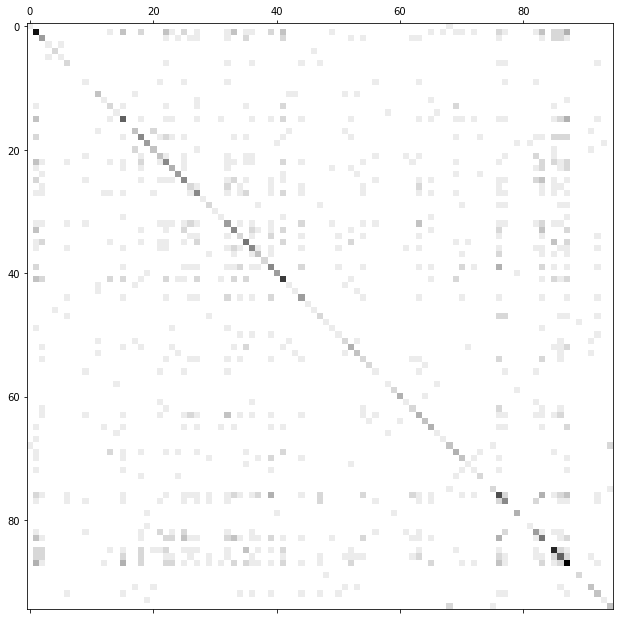

In [50]:
# visualize the matrix
plt.matshow(coMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

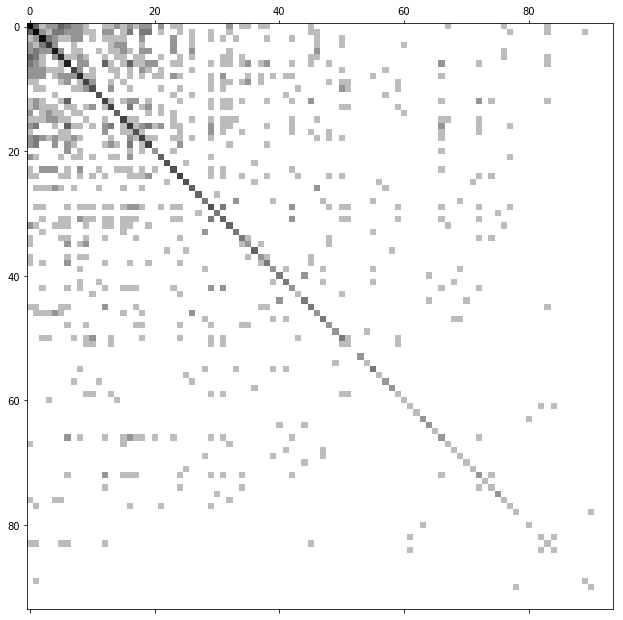

In [54]:
popular_indexing = mostRatedRestaurant
coMatrix_sorted = coMatrix[:,popular_indexing]
coMatrix_sorted_total = coMatrix_sorted[popular_indexing, :]
log_scale = np.log(coMatrix_sorted_total+1.0)
plt.matshow(log_scale, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [115]:
def co_occurrance_similarity(item_id, coocurrance, ntop=5):
    """
    Returns the top-N most similar items to a given one, based on the coocurrance matrix
    
    :param item_id: id of input item
    :param cooccurrance: 2-dim numpy array with the co-occurance matrix
    :param ntop: number of items to be retrieved
    
    :return top-N most similar items to the given item_id
    """
    similarItems = coocurrance[item_id, :]
    # return indeces of most similar items in descendign order
    mostSimilar = np.argsort(similarItems)[::-1]
    # remove the item itslef, maybe it's not the first element
    ##### mostSimilar = mostSimilar[1:ntop+1]
    mostSimilar = list(mostSimilar)
    mostSimilar.remove(item_id)
    mostSimilar = np.array(mostSimilar)[:ntop]
    
    # return a numpy array with the index (first column) and the value (second column) of the most similar items
    return np.stack((mostSimilar, similarItems[mostSimilar])).T

In [120]:
# First column are indices, while second one is the frequency of co-ocurrance
co_occurrance_similarity(1, coMatrix, 2)

array([[87.,  4.],
       [41.,  3.]])

In [121]:
co_occurrance_similarity(1, coMatrix, 5)

array([[87.,  4.],
       [41.,  3.],
       [15.,  3.],
       [22.,  3.],
       [83.,  3.]])

In [122]:
co_occurrance_similarity(1, coMatrix, 10)

array([[87.,  4.],
       [41.,  3.],
       [15.,  3.],
       [22.,  3.],
       [83.,  3.],
       [33.,  3.],
       [86.,  2.],
       [85.,  2.],
       [25.,  2.],
       [18.,  2.]])

In [123]:
co_occurrance_similarity(49, coMatrix, 5)

array([[ 1.,  1.],
       [83.,  1.],
       [23.,  1.],
       [32.,  1.],
       [94.,  0.]])

In [124]:
def co_occurrance_recommendation(items_id, cooccurrance, ntop=10):
    """
    Obtain the list of ntop recommendations based on a list of items (user history of views)
    
    :param items_id: list of items ids
    :param coocurrence: co-ocurrence matrix (numpy 2-dim array)
    :param ntop: top-K items to be retrieved
    
    :return list of ntop items recommended
    """
    # put together all the similar items and its value. For this, use np.vstack, wich stacks one array after 
    # another (row wise)
    list_sim_items = np.vstack([co_occurrance_similarity(id_, cooccurrance, ntop) for id_ in items_id])
    # Group by id and take the maximum frquency to remove duplicates
    largest_freq = pd.DataFrame(list_sim_items, columns=['id', 'freq']).groupby('id').agg(max).reset_index()
    
    # sort by value in descending order
    sorted_list = largest_freq.sort_values(by='freq', ascending=False)
    
    # get the top N
    out = sorted_list.values[:ntop, 0]
    return out

In [140]:
# get users in train with their movies
trainUsersGrouped = train[train['rating']>=1].groupby('userID')['placeID'].apply(list).reset_index()
testUsersGrouped = test[test['rating']>=1].groupby('userID')['placeID'].apply(list).reset_index()
trainUsersGrouped.head()

,userID,placeID
0,0,[69]
1,1,"[1, 15, 87, 2, 41, 27, 31, 33, 77]"
2,2,"[25, 76, 15, 1, 39, 65, 83, 33]"
3,3,"[85, 86, 32, 26, 63, 35, 2]"
4,4,"[27, 24, 85]"


In [141]:
co_occurrance_recommendation([1, 15, 87, 2, 41, 27, 31, 33, 77],coMatrix,5)

array([ 1., 87., 15., 41., 22.])

In [142]:
Ntop = 5
# Get the recommendations for all users using the apply method
predictions = trainUsersGrouped['placeID'].apply(lambda x: co_occurrance_recommendation(x, coMatrix, Ntop))
predictions.head()

0     [13.0, 41.0, 1.0, 18.0, 24.0]
1     [1.0, 87.0, 15.0, 41.0, 22.0]
2    [87.0, 83.0, 76.0, 39.0, 33.0]
3     [85.0, 63.0, 32.0, 35.0, 2.0]
4     [35.0, 2.0, 22.0, 41.0, 86.0]
Name: placeID, dtype: object

In [143]:
topN = 5
# add a prediction column to train
trainUsersGrouped['prediction'] = trainUsersGrouped['placeID'].apply(
    lambda x: co_occurrance_recommendation(x, coMatrix, topN)
)

In [144]:
trainUsersGrouped.head()

,userID,placeID,prediction
0,0,[69],"[13.0, 41.0, 1.0, 18.0, 24.0]"
1,1,"[1, 15, 87, 2, 41, 27, 31, 33, 77]","[1.0, 87.0, 15.0, 41.0, 22.0]"
2,2,"[25, 76, 15, 1, 39, 65, 83, 33]","[87.0, 83.0, 76.0, 39.0, 33.0]"
3,3,"[85, 86, 32, 26, 63, 35, 2]","[85.0, 63.0, 32.0, 35.0, 2.0]"
4,4,"[27, 24, 85]","[35.0, 2.0, 22.0, 41.0, 86.0]"


In [146]:
joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))

In [147]:
joined.head()

,userID,placeID_train,prediction,placeID_test
0,0,[69],"[13.0, 41.0, 1.0, 18.0, 24.0]","[22, 1]"
1,2,"[25, 76, 15, 1, 39, 65, 83, 33]","[87.0, 83.0, 76.0, 39.0, 33.0]","[12, 70]"
2,4,"[27, 24, 85]","[35.0, 2.0, 22.0, 41.0, 86.0]",[18]
3,5,"[54, 23, 62, 26, 76, 1, 44]","[87.0, 39.0, 83.0, 15.0, 41.0]","[6, 25, 65]"
4,6,"[62, 85, 24, 87, 22]","[1.0, 15.0, 76.0, 35.0, 2.0]",[82]


In [157]:
topN = 5
recall = joined.apply(lambda l: 
             recall_at_n(N=topN, test=l[3], recommended=l[2], train=l[1]), axis=1).mean()
print("recall@%s=%.3f"%(topN, recall))

recall@5=0.231


In [158]:
# do the same for different top k values. It might be convenient to define a function!
def evaluate_recall(topN, trainGrouped, testGrouped, coMatrix, popularity_baseline):
    # add a prediction column to train
    trainUsersGrouped['prediction'] = trainUsersGrouped['placeID'].apply(
        lambda x: co_occurrance_recommendation(x, coMatrix, topN)
    )
    # join with test data
    joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))
    # calculate average recall
    recall = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[3], recommended=l[2], train=l[1]), axis=1).mean()
    print("Co-occurance model: recall@%s=%.3f"%(topN, recall))
    # calculate average recall for the baseline
    recall_baseline = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[3], recommended=popularity_baseline, train=l[1]), axis=1).mean()
    print("Popularity model: recall@%s=%.3f"%(topN, recall_baseline))    
    return recall, recall_baseline

In [160]:
for k in [3,10,30,50,100]:
    evaluate_recall(k, trainUsersGrouped, testUsersGrouped, coMatrix, mostRatedRestaurant[:]);

Co-occurance model: recall@3=0.179
Popularity model: recall@3=0.144
Co-occurance model: recall@10=0.367
Popularity model: recall@10=0.238
Co-occurance model: recall@30=0.688
Popularity model: recall@30=0.500
Co-occurance model: recall@50=0.831
Popularity model: recall@50=0.688
Co-occurance model: recall@100=1.000
Popularity model: recall@100=1.000


In [161]:
def evaluate_map(topN, trainGrouped, testGrouped, coMatrix, popularity_baseline):
    # add a prediction column to train
    trainUsersGrouped['prediction'] = trainUsersGrouped['placeID'].apply(
        lambda x: co_occurrance_recommendation(x, coMatrix, topN)
    )
    # join with test data
    joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))
    # calculate average recall
    map_ = joined.apply(lambda l: 
             apk(N=topN, test=l[3], recommended=l[2], train=l[1]), axis=1).mean()
    print("Co-occurance model: map@%s=%.3f"%(topN, map_))
    map_baseline = joined.apply(lambda l: 
                 apk(N=topN, test=l[3], recommended=popularity_baseline, train=l[1]), axis=1).mean()
    print("Popularity model: map@%s=%.3f"%(topN, map_baseline))
    return map_, map_baseline

In [162]:
for k in [3,10,30,50,100]:
    evaluate_map(k, trainUsersGrouped, testUsersGrouped, coMatrix, mostRatedRestaurant[:]);

Co-occurance model: map@3=0.167
Popularity model: map@3=0.097
Co-occurance model: map@10=0.221
Popularity model: map@10=0.118
Co-occurance model: map@30=0.219
Popularity model: map@30=0.140
Co-occurance model: map@50=0.236
Popularity model: map@50=0.147
Co-occurance model: map@100=0.247
Popularity model: map@100=0.153
